# Estimativa pontual
Uma nova amostra aleatória de horas semanais trabalhadas por 30 funcionários
de mercearias é mostrada na tabela a seguir:

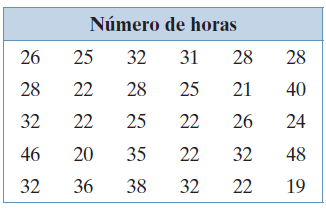

Use essa amostra para encontrar outra estimativa pontual para a média populacional $\mu$.

In [1]:
import pandas as pd
# Dados amostrais
horas = pd.Series([26, 28, 32, 46, 32, 25, 22, 22, 20, 36,
                   32, 28, 25, 35, 38, 31, 25, 22, 22, 32,
                   28, 21, 26, 32, 22, 28, 40, 24, 48, 19])
# Estimativa da média populacional
x_barra = horas.mean()
print(f'Estimativa da média populacional = {x_barra:.2f} horas.')

Estimativa da média populacional = 28.90 horas.


# Intervalo de confiança para a média, com $\sigma$ conhecido
Use os dados do da célula anterior para construir um intervalo de
confiança de 95% para o número médio de horas semanais trabalhadas
por funcionários de mercearias. Suponha que o desvio padrão da população
seja de 7,9 horas.

In [2]:
from scipy import stats as st
# Desvio padrão populacional conhecido
sigma = 7.9
# Nível de confiança
confianca = 0.95
# Desvio padrão da distribuiução normal das médias amostrais
n_amostras = len(horas)
sigma_x = sigma/n_amostras**0.5
# Intervalo de confiança de 95% para a média populacional
int_confianca = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)
print('*** Intervalo de conficança 95% para a média populacional ***')
print(f'({int_confianca[0]:.2f}, {int_confianca[1]:.2f})')

*** Intervalo de conficança 95% para a média populacional ***
(26.07, 31.73)


# Alterando o nível de confiança
Use os dados do exemplo anterior para construir intervalos de
confiança de 75%, 85% e 90% para o número médio de horas trabalhadas
por funcionários de mercearias. Como muda a largura do intervalo
de confiança à medida que o nível de confiança aumenta?

*** Intervalos de conficança para a média populacional ***
73.0% --> (27.31, 30.49)
85.0% --> (26.82, 30.98)
90.0% --> (26.53, 31.27)


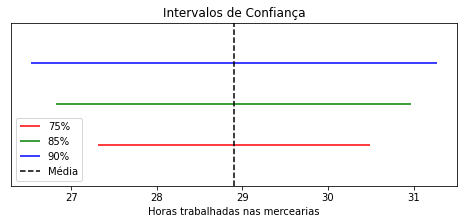

In [3]:
import matplotlib.pyplot as plt
# Níveis de confiança
niveis = [0.73, 0.85, 0.9]
# Intervalo de confiança para a média populacional
intervalos = [st.norm.interval(alpha=nivel, loc=x_barra, scale=sigma_x) for nivel in niveis]
# Exibição dos intervalos e construção gráfica
plt.figure(figsize=(8,3))
ALTURAS = [0.5, 1, 1.5]
CORES = ['r', 'g', 'b']
print('*** Intervalos de conficança para a média populacional ***')
for i in range(len(niveis)):
  print(f'{niveis[i]*100}% --> ({intervalos[i][0]:.2f}, {intervalos[i][1]:.2f})')
  plt.hlines(ALTURAS[i], intervalos[i][0], intervalos[i][1], colors=CORES[i])
# Atributos do gráfico
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.ylim(0, 2)
plt.vlines(x_barra, 0, 2, colors='k', linestyles='dashed')
plt.title('Intervalos de Confiança')
plt.xlabel('Horas trabalhadas nas mercearias')
plt.legend(['75%', '85%', '90%','Média'], loc='lower left')
plt.show()

# Intervalo de confiança para a média, com $\sigma$ desconhecido

Você seleciona aleatoriamente 16 cafeterias e mede a temperatura do café vendido em cada uma delas. A temperatura média da amostra é 162,0 ºF com desvio padrão de 10,0 ºF.

Construa os intervalos de confiança de 90% e 99% para a temperatura
média da população de cafés vendidos.

In [4]:
# Níveis de confiança
niveis = [0.90, 0.99]
# Atributos da distribuição
x_barra, std_amostral = 162, 10
num_amostras = 16
graus_liberdade = num_amostras - 1
# Intervalo de confiança para a média populacional
intervalos = [st.t.interval(alpha=nivel, df=graus_liberdade, loc=x_barra, scale=std_amostral/num_amostras**0.5) for nivel in niveis]
# Exibição dos intervalos
print('*** Intervalos de conficança para a média populacional ***')
for i in range(len(niveis)):
  print(f'{niveis[i]*100}% --> ({intervalos[i][0]:.2f}, {intervalos[i][1]:.2f})')

*** Intervalos de conficança para a média populacional ***
90.0% --> (157.62, 166.38)
99.0% --> (154.63, 169.37)


Você seleciona aleatoriamente 36 carros do mesmo modelo que foram
vendidos em uma concessionária, e determina o número de dias
que cada um permaneceu no pátio da concessionária antes de ser vendido.
A média amostral é de 9,75 dias, com um desvio padrão amostral
de 2,39 dias. Construa um intervalo de confiança de 99% para o número
médio populacional de dias que um carro permanece no pátio da
concessionária.

In [5]:
# Nível de confiança
nivel = 0.99
# Atributos da distribuição
x_barra, std_amostral = 9.75, 2.39
num_amostras = 36
graus_liberdade = num_amostras - 1
# Intervalo de confiança
intervalo = st.t.interval(alpha=nivel, loc=x_barra, df=graus_liberdade, scale=std_amostral/num_amostras**0.5)
print(f'Intervalo de confiança: ({intervalo[0]:.2f}, {intervalo[1]:.2f})')

Intervalo de confiança: (8.67, 10.83)


Considere o conjunto de dados a seguir (amostra de uma população). Construa um intervalo de confiança com 95% de confiança que contenha a média poulacional. Assuma que a população é normalmente distribuída.

*NOTA:* Para estimar o erro padrão da média ($s/\sqrt{n}$), use o método *sem* (standard error of the mean) do módulo *stats*.

In [7]:
import numpy as np
# Dados amostrais
amostras = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
            3, 4, 4, 5, 5, 5, 6, 7, 8, 10]
# Nível de confiança
nivel = 0.95
# Atributos da distribuição
x_barra = np.mean(amostras)
erro_padrao = st.sem(amostras)
num_amostras = len(amostras)
graus_liberdade = num_amostras - 1
# Intervalo de confiança
intervalo = st.t.interval(alpha=nivel,  loc=x_barra, df=graus_liberdade,scale=erro_padrao)
print(f'Intervalo de confiança: ({intervalo[0]:.2f}, {intervalo[1]:.2f})')

Intervalo de confiança: (2.76, 5.04)
